In [1]:
from requests import get
url = 'https://www.imdb.com/title/tt0386676/episodes?season=1'
response = get(url)
print(response.text[0:250])


 











<!DOCTYPE html>
<html
    xmlns:og="http://ogp.me/ns#"
    xmlns:fb="http://www.facebook.com/2008/fbml">
    <head>
         
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge">

    <meta name="


In [2]:
pip install bs4

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\ria.dhanani\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [3]:
from bs4 import BeautifulSoup

html_soup = BeautifulSoup(response.text, 'html.parser')
type(html_soup)

bs4.BeautifulSoup

In [4]:
episode_containers = html_soup.find_all('div', class_='info')

In [5]:
episode_containers[0].a['title']

'Pilot'

In [6]:
episode_containers[0].meta['content']

'1'

In [7]:
episode_containers[0].find('div', class_='airdate').text.strip()

'24 Mar. 2005'

In [8]:
episode_containers[0].find('span', class_='ipl-rating-star__rating').text

'7.5'

In [9]:
episode_containers[0].find('span', class_='ipl-rating-star__total-votes').text

'(6,328)'

In [10]:
episode_containers[0].find('div', class_='item_description').text.strip()

'The premiere episode introduces the boss and staff of the Dunder-Mifflin Paper Company in Scranton, Pennsylvania in a documentary about the workplace.'

In [11]:
community_episodes = []

for sn in range(1,10):
    response = get('https://www.imdb.com/title/tt0386676/episodes?season=' + str(sn))
    page_html = BeautifulSoup(response.text, 'html.parser')
    episode_containers = page_html.find_all('div', class_= 'info')
    
    for episodes in episode_containers:
        season = sn
        episode_number = episodes.meta['content']
        title = episodes.a['title']
        airdate = episodes.find('div', class_='airdate').text.strip()
        rating = episodes.find('span', class_='ipl-rating-star__rating').text
        total_votes = episodes.find('span', class_='ipl-rating-star__total-votes').text
        desc = episodes.find('div', class_='item_description').text.strip()
        episode_data = [season, episode_number, title, airdate, rating, total_votes, desc]
        community_episodes.append(episode_data)

In [13]:
import pandas as pd
community_episodes = pd.DataFrame(community_episodes, columns = ['season', 'episode_number', 'title', 'airdate', 'rating', 'total_votes', 'desc'])

community_episodes.head()

,season,episode_number,title,airdate,rating,total_votes,desc
0,1,1,Pilot,24 Mar. 2005,7.5,"(6,328)",The premiere episode introduces the boss and s...
1,1,2,Diversity Day,29 Mar. 2005,8.3,"(6,217)",Michael's off color remark puts a sensitivity ...
2,1,3,Health Care,5 Apr. 2005,7.8,"(5,200)",Michael leaves Dwight in charge of picking the...
3,1,4,The Alliance,12 Apr. 2005,8.0,"(5,054)","Just for a laugh, Jim agrees to an alliance wi..."
4,1,5,Basketball,19 Apr. 2005,8.4,"(5,585)",Michael and his staff challenge the warehouse ...


In [14]:
def remove_str(votes):
    for r in ((',',''), ('(',''),(')','')):
        votes = votes.replace(*r)
        
    return votes

In [15]:
community_episodes['total_votes'] = community_episodes.total_votes.apply(remove_str).astype(int)

community_episodes.head()

,season,episode_number,title,airdate,rating,total_votes,desc
0,1,1,Pilot,24 Mar. 2005,7.5,6328,The premiere episode introduces the boss and s...
1,1,2,Diversity Day,29 Mar. 2005,8.3,6217,Michael's off color remark puts a sensitivity ...
2,1,3,Health Care,5 Apr. 2005,7.8,5200,Michael leaves Dwight in charge of picking the...
3,1,4,The Alliance,12 Apr. 2005,8.0,5054,"Just for a laugh, Jim agrees to an alliance wi..."
4,1,5,Basketball,19 Apr. 2005,8.4,5585,Michael and his staff challenge the warehouse ...


In [16]:
community_episodes['rating'] = community_episodes.rating.astype(float)

In [17]:
community_episodes['airdate'] = pd.to_datetime(community_episodes.airdate)

community_episodes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   season          188 non-null    int64         
 1   episode_number  188 non-null    object        
 2   title           188 non-null    object        
 3   airdate         188 non-null    datetime64[ns]
 4   rating          188 non-null    float64       
 5   total_votes     188 non-null    int32         
 6   desc            188 non-null    object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(3)
memory usage: 9.7+ KB


In [31]:
community_episodes.head()

,season,episode_number,title,airdate,rating,total_votes,desc
0,1,1,Pilot,2005-03-24,7.5,6328,The premiere episode introduces the boss and s...
1,1,2,Diversity Day,2005-03-29,8.3,6217,Michael's off color remark puts a sensitivity ...
2,1,3,Health Care,2005-04-05,7.8,5200,Michael leaves Dwight in charge of picking the...
3,1,4,The Alliance,2005-04-12,8.0,5054,"Just for a laugh, Jim agrees to an alliance wi..."
4,1,5,Basketball,2005-04-19,8.4,5585,Michael and his staff challenge the warehouse ...


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
def label_review(row):
   if row['rating'] >= 8.0 :
      return 'Great episode'
   if row['rating'] < 5.0 :
      return 'Bad episode'
   return 'Good episode, kind of funny'

In [25]:
community_episodes.apply (lambda row: label_review(row), axis=1)

0      Good episode, kind of funny
1                    Great episode
2      Good episode, kind of funny
3                    Great episode
4                    Great episode
                  ...             
183                  Great episode
184                  Great episode
185                  Great episode
186                  Great episode
187                  Great episode
Length: 188, dtype: object

In [39]:
community_episodes = community_episodes.sort_values(by ='rating',ascending=False)
community_episodes

,season,episode_number,title,airdate,rating,total_votes,desc
187,9,23,Finale,2013-05-16,9.8,13729,"One year later, Dunder Mifflin employees past ..."
137,7,21,"Goodbye, Michael",2011-04-28,9.8,11023,As the office gets ready for Michael's final d...
77,5,13,Stress Relief,2009-02-01,9.7,10768,Dwight's too-realistic fire alarm gives Stanle...
186,9,22,A.A.R.M.,2013-05-09,9.5,5355,Dwight prepares for a marriage proposal and hi...
95,6,5,Niagara: Part 2,2009-10-08,9.5,4577,Pam is forced to deal with an embarrassing inj...
...,...,...,...,...,...,...,...
160,8,20,Welcome Party,2012-04-12,7.0,2658,Andy tries to break up with his girlfriend aft...
161,8,21,Angry Andy,2012-04-19,6.9,2871,"Andy and Erin return to Dunder Mifflin, only t..."
104,6,14,The Banker,2010-01-21,6.8,3992,A banker representing a potential buyer comes ...
148,8,8,Gettysburg,2011-11-17,6.8,2812,Andy decides to motivate and inspire everyone ...


<AxesSubplot:xlabel='season', ylabel='rating'>

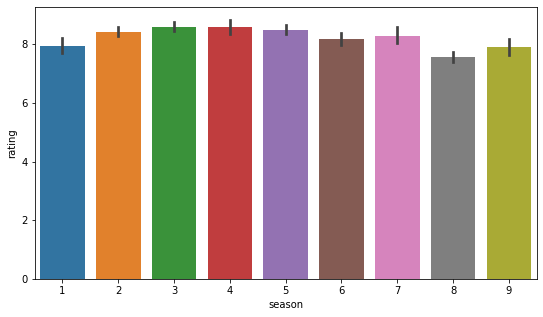

In [55]:
plt.figure(figsize=[9,5])
# season = community_episodes['season'].head(12)
# rating = community_episodes['rating'].head(12)
 
# # Figure Size
# fig = plt.figure(figsize =(10, 7))
 
# # Horizontal Bar Plot
# plt.bar(season[0:10], rating[0:10])
 
# plt.xlabel("season number")
# plt.ylabel("Rating")
# plt.title("Season wise rating")

# # Show Plot
# plt.show()

sns.barplot(x='season',y='rating',data=community_episodes)